<a href="https://colab.research.google.com/github/rzqmhb/uts-machine-learning-ti3f/blob/main/UTS_RoziqMahbubi_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [7]:
from IPython.utils.path import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.cluster import KMeans

### Import Dataset

In [8]:
plats=[]
for img in glob.glob('/content/drive/MyDrive/Kuliah_SMT_5/ML/DummyUTS/*.jpg'):
  n = cv.imread(img)
  plats.append(n)

### Function Color Scatter Plot

In [9]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

### Proses Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

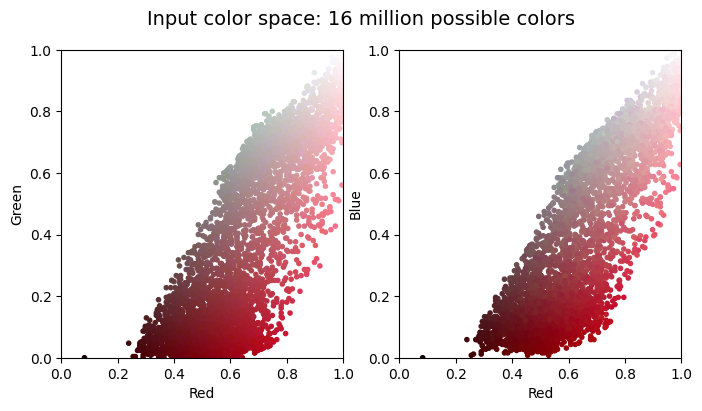

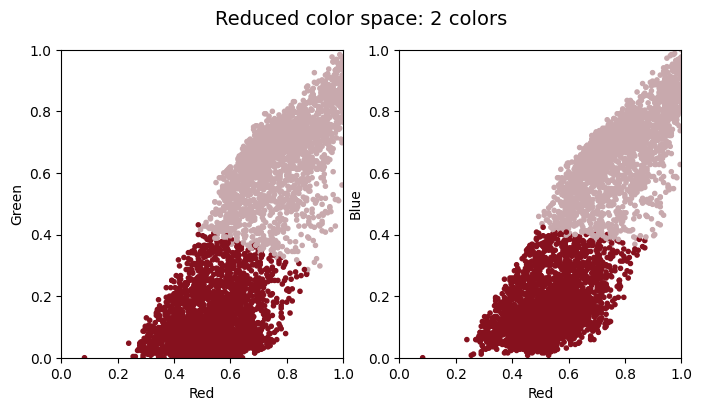

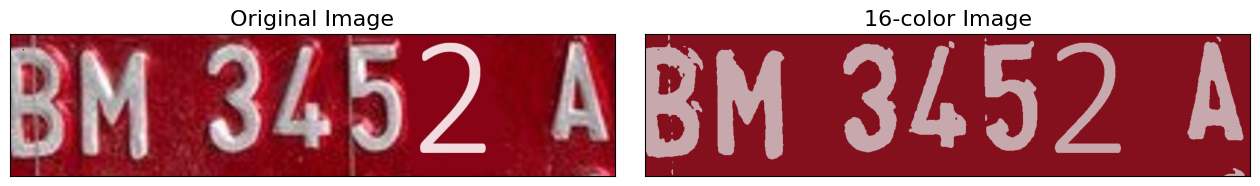

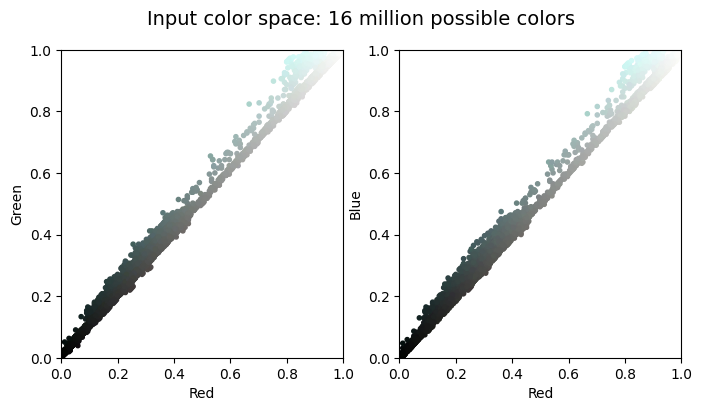

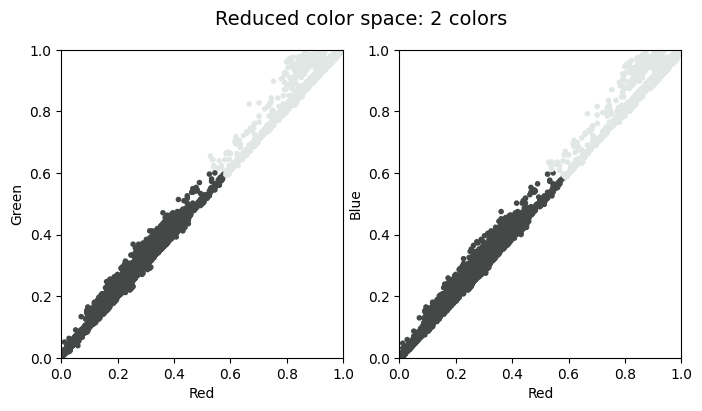

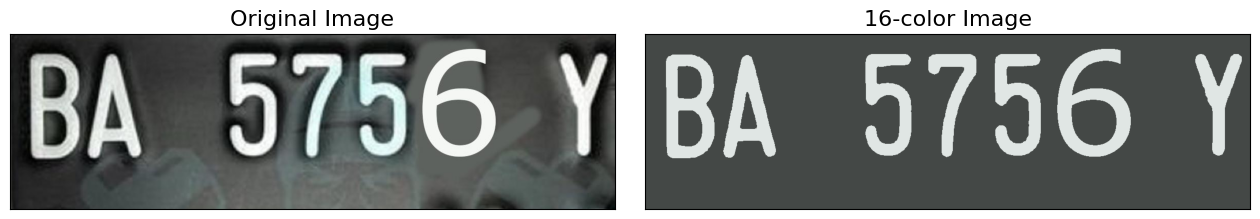

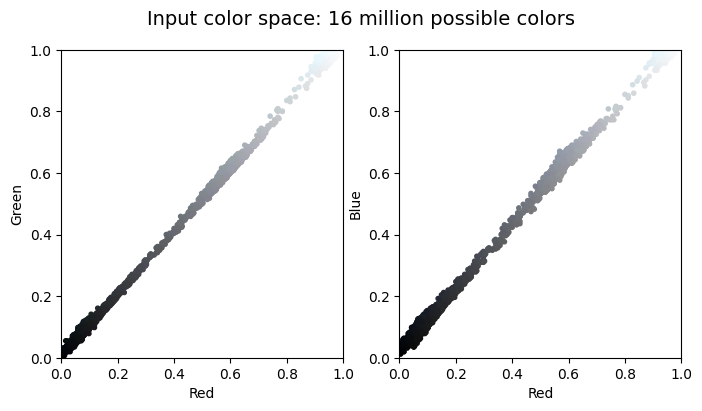

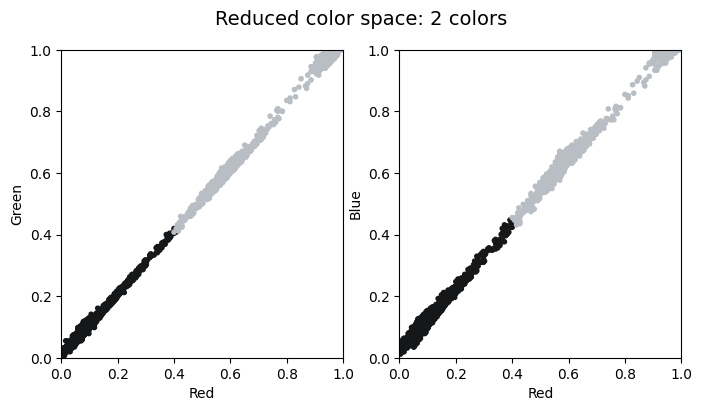

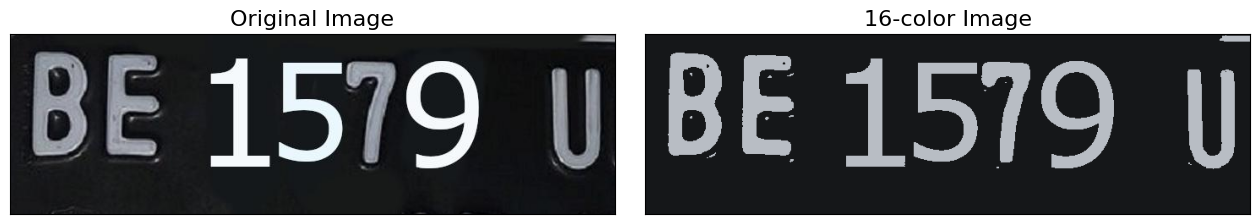

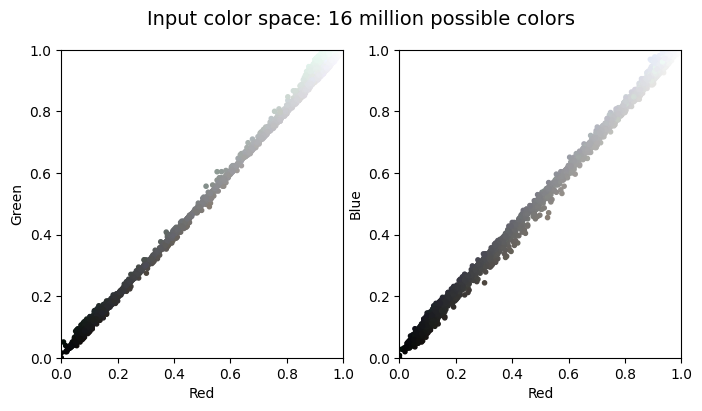

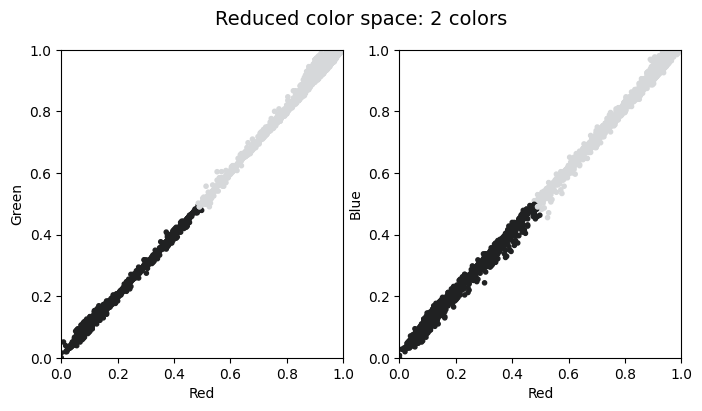

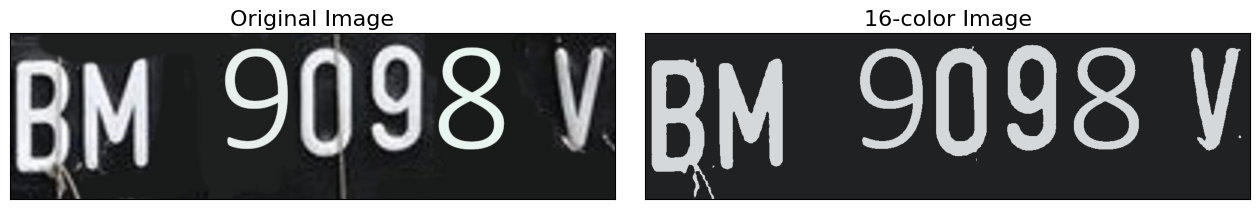

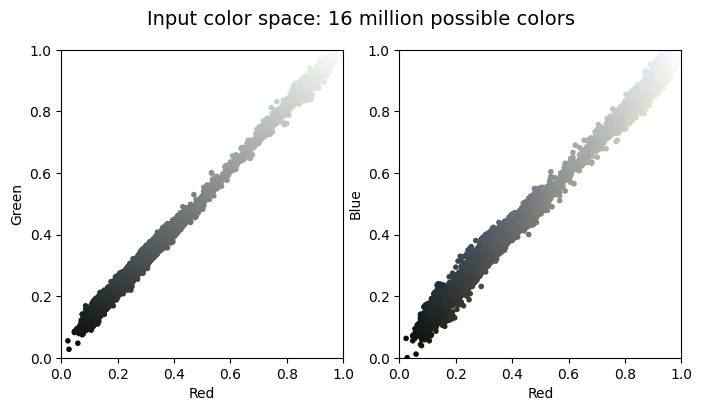

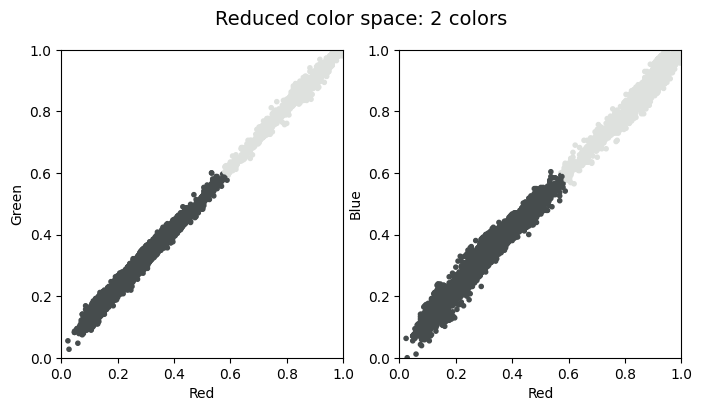

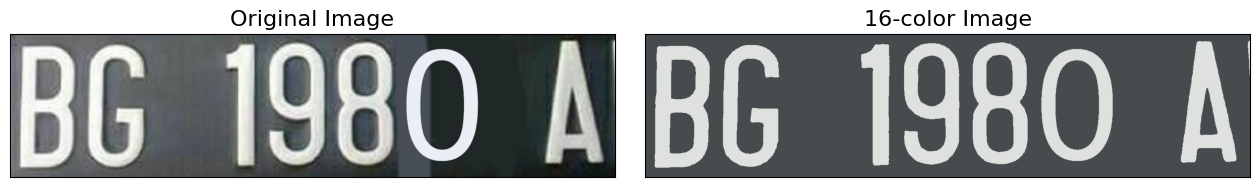

In [13]:
for img in plats:
  h, w, ch= img.shape
  data = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data = data / 255.0
  data = data.reshape(h * w, ch)

  plot_pixels(data, title='Input color space: 16 million possible colors')

  kmeans = KMeans(2)
  kmeans.fit(data)
  new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

  plot_pixels(data, colors=new_colors,title="Reduced color space: 2 colors")

  plat_recolored = new_colors.reshape(img.shape)
  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(plat_recolored)
  ax[1].set_title('16-color Image', size=16)